In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import RFECV, RFE
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTENC
# from sklearn.neighbors import KNeighborsClassifier
from timeit import default_timer
import seaborn as sns
%matplotlib inline

In [2]:
column_types = {'Severity': 'int8',
 'Start_Lat': 'float32',
 'Start_Lng': 'float32',
 'End_Lat': 'float32',
 'End_Lng': 'float32',
 'Distance(mi)': 'float32',
 'Temperature(F)': 'float32',
 'Wind_Chill(F)': 'float32',
 'Humidity(%)': 'float32',
 'Pressure(in)': 'float32',
 'Visibility(mi)': 'float32',
 'Wind_Speed(mph)': 'float32',
 'Precipitation(in)': 'float32',
 'Amenity': 'float32',
 'Bump': 'float32',
 'Crossing': 'float32',
 'Give_Way': 'float32',
 'Junction': 'float32',
 'No_Exit': 'float32',
 'Railway': 'float32',
 'Roundabout': 'float32',
 'Station': 'float32',
 'Stop': 'float32',
 'Traffic_Calming': 'float32',
 'Traffic_Signal': 'float32',
 'Turning_Loop': 'float32',
 'Side_R': 'int8',
 'Wind_Direction_E': 'int8',
 'Wind_Direction_N': 'int8',
 'Wind_Direction_NE': 'int8',
 'Wind_Direction_NW': 'int8',
 'Wind_Direction_S': 'int8',
 'Wind_Direction_SE': 'int8',
 'Wind_Direction_SW': 'int8',
 'Wind_Direction_VAR': 'int8',
 'Wind_Direction_W': 'int8',
 'Weather_Condition_Blowing Dust / Windy': 'int8',
 'Weather_Condition_Clear': 'int8',
 'Weather_Condition_Cloudy': 'int8',
 'Weather_Condition_Cloudy / Windy': 'int8',
 'Weather_Condition_Drizzle': 'int8',
 'Weather_Condition_Drizzle / Windy': 'int8',
 'Weather_Condition_Dust Whirls': 'int8',
 'Weather_Condition_Fair': 'int8',
 'Weather_Condition_Fair / Windy': 'int8',
 'Weather_Condition_Fog': 'int8',
 'Weather_Condition_Fog / Windy': 'int8',
 'Weather_Condition_Hail': 'int8',
 'Weather_Condition_Haze': 'int8',
 'Weather_Condition_Haze / Windy': 'int8',
 'Weather_Condition_Heavy Drizzle': 'int8',
 'Weather_Condition_Heavy Rain': 'int8',
 'Weather_Condition_Heavy Rain / Windy': 'int8',
 'Weather_Condition_Heavy Rain Shower': 'int8',
 'Weather_Condition_Heavy Snow': 'int8',
 'Weather_Condition_Heavy T-Storm': 'int8',
 'Weather_Condition_Heavy Thunderstorms and Rain': 'int8',
 'Weather_Condition_Light Drizzle': 'int8',
 'Weather_Condition_Light Freezing Fog': 'int8',
 'Weather_Condition_Light Freezing Rain': 'int8',
 'Weather_Condition_Light Rain': 'int8',
 'Weather_Condition_Light Rain / Windy': 'int8',
 'Weather_Condition_Light Rain Shower': 'int8',
 'Weather_Condition_Light Rain Shower / Windy': 'int8',
 'Weather_Condition_Light Rain Showers': 'int8',
 'Weather_Condition_Light Rain with Thunder': 'int8',
 'Weather_Condition_Light Snow': 'int8',
 'Weather_Condition_Light Snow / Windy': 'int8',
 'Weather_Condition_Light Snow Showers': 'int8',
 'Weather_Condition_Light Thunderstorms and Rain': 'int8',
 'Weather_Condition_Mist': 'int8',
 'Weather_Condition_Mostly Cloudy': 'int8',
 'Weather_Condition_Mostly Cloudy / Windy': 'int8',
 'Weather_Condition_N/A Precipitation': 'int8',
 'Weather_Condition_Overcast': 'int8',
 'Weather_Condition_Partial Fog': 'int8',
 'Weather_Condition_Partly Cloudy': 'int8',
 'Weather_Condition_Partly Cloudy / Windy': 'int8',
 'Weather_Condition_Patches of Fog': 'int8',
 'Weather_Condition_Rain': 'int8',
 'Weather_Condition_Rain / Windy': 'int8',
 'Weather_Condition_Rain Shower': 'int8',
 'Weather_Condition_Rain Showers': 'int8',
 'Weather_Condition_Scattered Clouds': 'int8',
 'Weather_Condition_Shallow Fog': 'int8',
 'Weather_Condition_Showers in the Vicinity': 'int8',
 'Weather_Condition_Smoke': 'int8',
 'Weather_Condition_Smoke / Windy': 'int8',
 'Weather_Condition_Snow': 'int8',
 'Weather_Condition_Snow / Windy': 'int8',
 'Weather_Condition_Squalls': 'int8',
 'Weather_Condition_Squalls / Windy': 'int8',
 'Weather_Condition_T-Storm': 'int8',
 'Weather_Condition_Thunder': 'int8',
 'Weather_Condition_Thunder in the Vicinity': 'int8',
 'Weather_Condition_Thunderstorm': 'int8',
 'Weather_Condition_Thunderstorms and Rain': 'int8',
 'Weather_Condition_Widespread Dust': 'int8',
 'Weather_Condition_Wintry Mix': 'int8',
 'Sunrise_Sunset_Night': 'int8',
 'Civil_Twilight_Night': 'int8',
 'Nautical_Twilight_Night': 'int8',
 'Astronomical_Twilight_Night': 'int8',
 'Start_Time_year_2017': 'int8',
 'Start_Time_year_2018': 'int8',
 'Start_Time_year_2019': 'int8',
 'Start_Time_year_2020': 'int8',
 'Start_Time_month_2': 'int8',
 'Start_Time_month_3': 'int8',
 'Start_Time_month_4': 'int8',
 'Start_Time_month_5': 'int8',
 'Start_Time_month_6': 'int8',
 'Start_Time_month_7': 'int8',
 'Start_Time_month_8': 'int8',
 'Start_Time_month_9': 'int8',
 'Start_Time_month_10': 'int8',
 'Start_Time_month_11': 'int8',
 'Start_Time_month_12': 'int8',
 'Start_Time_hour_1': 'int8',
 'Start_Time_hour_2': 'int8',
 'Start_Time_hour_3': 'int8',
 'Start_Time_hour_4': 'int8',
 'Start_Time_hour_5': 'int8',
 'Start_Time_hour_6': 'int8',
 'Start_Time_hour_7': 'int8',
 'Start_Time_hour_8': 'int8',
 'Start_Time_hour_9': 'int8',
 'Start_Time_hour_10': 'int8',
 'Start_Time_hour_11': 'int8',
 'Start_Time_hour_12': 'int8',
 'Start_Time_hour_13': 'int8',
 'Start_Time_hour_14': 'int8',
 'Start_Time_hour_15': 'int8',
 'Start_Time_hour_16': 'int8',
 'Start_Time_hour_17': 'int8',
 'Start_Time_hour_18': 'int8',
 'Start_Time_hour_19': 'int8',
 'Start_Time_hour_20': 'int8',
 'Start_Time_hour_21': 'int8',
 'Start_Time_hour_22': 'int8',
 'Start_Time_hour_23': 'int8',
 'Start_Time_weekday_1': 'int8',
 'Start_Time_weekday_2': 'int8',
 'Start_Time_weekday_3': 'int8',
 'Start_Time_weekday_4': 'int8',
 'Start_Time_weekday_5': 'int8',
 'Start_Time_weekday_6': 'int8',
 'End_Time_year_2017': 'int8',
 'End_Time_year_2018': 'int8',
 'End_Time_year_2019': 'int8',
 'End_Time_year_2020': 'int8',
 'End_Time_month_2': 'int8',
 'End_Time_month_3': 'int8',
 'End_Time_month_4': 'int8',
 'End_Time_month_5': 'int8',
 'End_Time_month_6': 'int8',
 'End_Time_month_7': 'int8',
 'End_Time_month_8': 'int8',
 'End_Time_month_9': 'int8',
 'End_Time_month_10': 'int8',
 'End_Time_month_11': 'int8',
 'End_Time_month_12': 'int8',
 'End_Time_hour_1': 'int8',
 'End_Time_hour_2': 'int8',
 'End_Time_hour_3': 'int8',
 'End_Time_hour_4': 'int8',
 'End_Time_hour_5': 'int8',
 'End_Time_hour_6': 'int8',
 'End_Time_hour_7': 'int8',
 'End_Time_hour_8': 'int8',
 'End_Time_hour_9': 'int8',
 'End_Time_hour_10': 'int8',
 'End_Time_hour_11': 'int8',
 'End_Time_hour_12': 'int8',
 'End_Time_hour_13': 'int8',
 'End_Time_hour_14': 'int8',
 'End_Time_hour_15': 'int8',
 'End_Time_hour_16': 'int8',
 'End_Time_hour_17': 'int8',
 'End_Time_hour_18': 'int8',
 'End_Time_hour_19': 'int8',
 'End_Time_hour_20': 'int8',
 'End_Time_hour_21': 'int8',
 'End_Time_hour_22': 'int8',
 'End_Time_hour_23': 'int8',
 'End_Time_weekday_1': 'int8',
 'End_Time_weekday_2': 'int8',
 'End_Time_weekday_3': 'int8',
 'End_Time_weekday_4': 'int8',
 'End_Time_weekday_5': 'int8',
 'End_Time_weekday_6': 'int8'}

In [3]:
inicio = default_timer()
pd.set_option('max_columns', None)

In [4]:
df = pd.read_csv('US_Accidents_Dec20_with_dummies_CA.csv', dtype=column_types)

In [5]:
df.shape

(406836, 191)

In [6]:
df.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Side_R,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_VAR,Wind_Direction_W,Weather_Condition_Blowing Dust / Windy,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Cloudy / Windy,Weather_Condition_Drizzle,Weather_Condition_Drizzle / Windy,Weather_Condition_Dust Whirls,Weather_Condition_Fair,Weather_Condition_Fair / Windy,Weather_Condition_Fog,Weather_Condition_Fog / Windy,Weather_Condition_Hail,Weather_Condition_Haze,Weather_Condition_Haze / Windy,Weather_Condition_Heavy Drizzle,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Rain / Windy,Weather_Condition_Heavy Rain Shower,Weather_Condition_Heavy Snow,Weather_Condition_Heavy T-Storm,Weather_Condition_Heavy Thunderstorms and Rain,Weather_Condition_Light Drizzle,Weather_Condition_Light Freezing Fog,Weather_Condition_Light Freezing Rain,Weather_Condition_Light Rain,Weather_Condition_Light Rain / Windy,Weather_Condition_Light Rain Shower,Weather_Condition_Light Rain Shower / Windy,Weather_Condition_Light Rain Showers,Weather_Condition_Light Rain with Thunder,Weather_Condition_Light Snow,Weather_Condition_Light Snow / Windy,Weather_Condition_Light Snow Showers,Weather_Condition_Light Thunderstorms and Rain,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_Mostly Cloudy / Windy,Weather_Condition_N/A Precipitation,Weather_Condition_Overcast,Weather_Condition_Partial Fog,Weather_Condition_Partly Cloudy,Weather_Condition_Partly Cloudy / Windy,Weather_Condition_Patches of Fog,Weather_Condition_Rain,Weather_Condition_Rain / Windy,Weather_Condition_Rain Shower,Weather_Condition_Rain Showers,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Showers in the Vicinity,Weather_Condition_Smoke,Weather_Condition_Smoke / Windy,Weather_Condition_Snow,Weather_Condition_Snow / Windy,Weather_Condition_Squalls,Weather_Condition_Squalls / Windy,Weather_Condition_T-Storm,Weather_Condition_Thunder,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Widespread Dust,Weather_Condition_Wintry Mix,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night,Start_Time_year_2017,Start_Time_year_2018,Start_Time_year_2019,Start_Time_year_2020,Start_Time_month_2,Start_Time_month_3,Start_Time_month_4,Start_Time_month_5,Start_Time_month_6,Start_Time_month_7,Start_Time_month_8,Start_Time_month_9,Start_Time_month_10,Start_Time_month_11,Start_Time_month_12,Start_Time_hour_1,Start_Time_hour_2,Start_Time_hour_3,Start_Time_hour_4,Start_Time_hour_5,Start_Time_hour_6,Start_Time_hour_7,Start_Time_hour_8,Start_Time_hour_9,Start_Time_hour_10,Start_Time_hour_11,Start_Time_hour_12,Start_Time_hour_13,Start_Time_hour_14,Start_Time_hour_15,Start_Time_hour_16,Start_Time_hour_17,Start_Time_hour_18,Start_Time_hour_19,Start_Time_hour_20,Start_Time_hour_21,Start_Time_hour_22,Start_Time_hour_23,Start_Time_weekday_1,Start_Time_weekday_2,Start_Time_weekday_3,Start_Time_weekday_4,Start_Time_weekday_5,Start_Time_weekday_6,End_Time_year_2017,End_Time_year_2018,End_Time_year_2019,End_Time_year_2020,End_Time_month_2,End_Time_month_3,End_Time_month_4,End_Time_month_5,End_Time_month_6,End_Time_month_7,End_Time_month_8,End_Time_month_9,End_Time_month_10,End_Time_month_11,End_Time_month_12,End_Time_hour_1,End_Time_hour_2,End_Time_hour_3,End_Time_hour_4,End_Time_hour_5,End_Time_hour_6,End_Time_hour_7,End_Time_hour_8,End_Time_hour_9,End_Time_hour_10,End_Time_hour_11,End_Time_hour_12,End_Time_hour_13,End_Time_hour_14,End_Time_hour_15,End_Time_hour_16,End_Time_hour_17,End_Time_hour_18,End_Time_

#### Tomamos el año 2019

In [7]:
years_2019 = (df.Start_Time_year_2019 == 1)

In [8]:
df_19 = df[years_2019]

In [9]:
df_19.Severity.unique()

array([2, 4, 3], dtype=int8)

In [10]:
df_19.shape

(101986, 191)

#### Tomamos el año 2020

In [11]:
year_20 = df.Start_Time_year_2020 == 1
df_20 = df[year_20]

In [12]:
df_20.Severity.unique()

array([2, 4, 1, 3], dtype=int8)

In [13]:
df_20.Severity.value_counts(normalize=True)

2    0.949564
1    0.024097
3    0.016715
4    0.009624
Name: Severity, dtype: float64

In [14]:
df_20.shape

(223927, 191)

##### Convertimos el valor de Severity 1 a 2 ya que en el año 2020 había un numero de más de severity

In [15]:
df_20['Severity'] = df_20['Severity'].apply(lambda x: 2 if x == 1 else x)

<ipython-input-15-6e2026ef0cfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20['Severity'] = df_20['Severity'].apply(lambda x: 2 if x == 1 else x)


In [16]:
df_20.Severity.unique()

array([2, 4, 3], dtype=int64)

In [17]:
df_20.Severity.value_counts(normalize=True)

2    0.973661
3    0.016715
4    0.009624
Name: Severity, dtype: float64

#### Tomamos todos los años menos el 2020 y 2019

In [18]:
(df[year_20].index) | (df[years_2019].index)

Int64Index([ 45613,  45614,  45615,  45616,  45617,  45618,  45619,  45620,
             45621,  45622,
            ...
            406826, 406827, 406828, 406829, 406830, 406831, 406832, 406833,
            406834, 406835],
           dtype='int64', length=325913)

In [19]:
df_menos_20 = df.drop(labels=((df[year_20].index) | (df[years_2019].index)))

In [20]:
df_menos_20.Severity.unique()

array([3, 2, 4], dtype=int8)

### Tomando el año 2019 creamos un Pipeline para ver la cantidad de features a seleccionar

In [21]:
X= df_19.drop('Severity', axis=1)
y = df_19.Severity -2

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.3)

In [23]:
y_train.value_counts()

0    68073
1     2231
2     1086
Name: Severity, dtype: int64

In [24]:
kf = StratifiedKFold(n_splits=5, shuffle=True)

In [25]:
pasos = [('scaler',StandardScaler()),('selection', SelectKBest(f_classif, k=10)), ('XGBoost', XGBClassifier(learning_rate=0.3, max_depth=16, n_jobs=-1))]

In [26]:
pipe = Pipeline(pasos)

In [27]:
params_k = [10,30,50,80,100]

In [28]:
import warnings
warnings.filterwarnings('ignore')

scores = []

for k in params_k:
    gs = GridSearchCV(pipe, param_grid=[{'selection__k':[k]}], cv=kf, return_train_score = False, n_jobs=-1)
    gs.fit(X_train, y_train)
    y_pred = gs.predict(X_test)
    scores.append({
        'k': k,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_,
        'f1 score': f1_score(y_test, y_pred, average='micro'),
        'auc score': roc_auc_score(y_test, gs.predict_proba(X_test), multi_class='ovo', average='weighted')
    })

[18:37:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:40:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [29]:
scores_pipeline = pd.DataFrame(scores, columns=['k', 'best_score', 'best_params', 'f1 score', 'auc score'])

In [30]:
scores_pipeline

,k,best_score,best_params,f1 score,auc score
0,10,0.947766,{'selection__k': 10},0.949405,0.932677
1,30,0.952024,{'selection__k': 30},0.953229,0.947071
2,50,0.961171,{'selection__k': 50},0.961269,0.962545
3,80,0.963888,{'selection__k': 80},0.965649,0.967744
4,100,0.964743,{'selection__k': 100},0.965061,0.966922


#### Seleccionamos mejores 50 columnas

In [31]:
def select_kbest_reg(data_frame, target, k):
    """
    Seleccionado K-Best features para regresión
    :param data_frame: Un dataframe con datos
    :param target: target en el dataframe
    :param k: cantidad deseada de features
    :devuelve un dataframe llamado feature_scores con los scores para cada feature
    """
    feat_selector = SelectKBest(f_classif, k=k)    
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_.round(4)
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores

kbest_feat = select_kbest_reg(df_19, "Severity", k=80)
kbest_feat = kbest_feat.sort_values(["F Score", "P Value"], ascending=[False, False])
kbest_feat.reset_index(drop=True)

,F Score,P Value,Support,Attribute
0,4524.449240,0.0,True,Distance(mi)
1,1321.490056,0.0,True,Start_Time_month_5
2,1317.265297,0.0,True,End_Time_month_5
3,1067.281006,0.0,True,Weather_Condition_Clear
4,864.806061,0.0,True,Start_Time_month_7
...,...,...,...,...
185,NaN,NaN,False,Start_Time_year_2017
186,NaN,NaN,False,Start_Time_year_2018
187,NaN,NaN,False,Start_Time_year_2020
188,NaN,NaN,False,End_Time_year_2017


In [32]:
select = kbest_feat.loc[kbest_feat['Support'] == True,'Attribute']
df_19_reduced = df_19[select].reset_index(drop=True)
df_19_reduced.head()

,Distance(mi),Start_Time_month_5,End_Time_month_5,Weather_Condition_Clear,Start_Time_month_7,End_Time_month_7,Start_Time_month_6,End_Time_month_6,Start_Time_month_4,End_Time_month_4,Start_Time_month_3,End_Time_month_3,Start_Time_month_10,End_Time_month_10,Start_Time_month_12,End_Time_month_12,Weather_Condition_Overcast,End_Time_month_2,Start_Time_month_2,End_Time_month_9,Start_Time_month_9,Weather_Condition_Fair,Wind_Speed(mph),End_Time_month_11,Start_Time_month_11,End_Time_month_8,Start_Time_month_8,Weather_Condition_Scattered Clouds,Side_R,Astronomical_Twilight_Night,Nautical_Twilight_Night,Humidity(%),Civil_Twilight_Night,Start_Time_hour_21,Sunrise_Sunset_Night,Junction,Start_Time_hour_4,Traffic_Signal,Wind_Direction_SW,Weather_Condition_Light Rain,Wind_Direction_W,End_Lat,Start_Lat,Pressure(in),End_Time_hour_4,Start_Time_hour_15,Wind_Direction_S,End_Time_hour_22,End_Time_hour_2,End_Time_hour_9,End_Time_hour_5,End_Time_hour_16,End_Time_weekday_6,Start_Time_hour_7,Start_Time_hour_1,Start_Time_weekday_6,Weather_Condition_Heavy Thunderstorms and Rain,Start_Time_hour_10,End_Time_hour_15,Start_Time_hour_8,End_Lng,End_Time_weekday_1,End_Time_hour_8,End_Time_hour_11,End_Time_hour_10,Start_Time_weekday_1,Weather_Condition_Light Freezing Fog,End_Time_hour_17,Start_Time_hour_17,Crossing,Start_Time_weekday_5,End_Time_hour_3,End_Time_weekday_5,Start_Time_hour_3,Wind_Chill(F),Start_Time_hour_16,Station,End_Time_hour_18,End_Time_hour_21,Start_Time_weekday_4
0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0.0,0,0,0,0,0,1,1,1,86.0,1,1,1,0.0,0,0.0,0,0,0,37.780933,37.780933,30.150000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-122.173271,1,0,0,0,1,0,0,0,0.0,0,0,0,0,50.0,0,0.0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6.0,0,0,0,0,0,1,0,0,69.0,1,0,1,0.0,0,0.0,0,0,1,37.759823,37.759823,30.120001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-122.392242,0,0,0,0,1,0,0,1,0.0,0,0,0,0,54.0,0,0.0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,6.0,0,0,0,0,0,1,1,1,93.0,1,1,1,0.0,0,0.0,0,0,0,38.611538,38.611538,30.070000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-121.264053,1,0,0,0,1,0,0,0,0.0,0,0,0,0,39.0,0,0.0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,8.0,0,0,0,0,0,1,1,1,96.0,1,0,1,0.0,0,0.0,0,0,1,41.930073,41.930073,29.740000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-124.145988,1,0,0,0,1,0,0,0,0.0,0,0,0,0,44.0,0,0.0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0.0,0,0,0,0,0,1,1,1,86.0,1,0,1,0.0,0,0.0,0,0,0,37.784168,37.784168,30.150000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-122.184196,1,0,0,0,1,0,0,0,0.0,0,0,0,0,50.0,0,0.0,0,0,0


In [33]:
df_19_reduced.shape

(101986, 80)

#### Dividimos en x e y

In [34]:
X = df_19_reduced
y = df_19.Severity -2

In [35]:
y.unique()

array([0, 2, 1], dtype=int8)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.3) # Dividimos en train y test 

In [37]:
y_test.shape

(30596,)

In [38]:
y_test.value_counts()

0    29174
1      957
2      465
Name: Severity, dtype: int64

#### Instanciamos SMOTE-NC para balanceo de multiclases


In [39]:
indices = []
for index in enumerate(X_train):
    if len(X_train.iloc[:,index[0]].unique()) == 2:
        indices.append(index[0])

In [40]:
smotenc = SMOTENC(categorical_features=indices, n_jobs=-1)

In [41]:
X_train_sm, y_train_sm = smotenc.fit_resample(X_train, y_train)

In [42]:
y_train_sm.value_counts()

2    68073
1    68073
0    68073
Name: Severity, dtype: int64

##### Definimos una función para balancear clases

In [43]:
def smoting(X_train, y_train, resample):
    smotenc = SMOTENC(categorical_features=indices, n_jobs=-1, sampling_strategy={1:resample,2:resample}) #Balancea las clases 1 y 2 con el parámetro que se pasa en resample
    X_train_sm, y_train_sm = smotenc.fit_resample(X_train, y_train)
    return X_train_sm, y_train_sm

#### Usamo grilla de parametros para probar mejores modelos que tengan balanceo de clases en un gridsearch

In [44]:
model_params = {
    'Random Forest Classifier':{
        'model': RandomForestClassifier(class_weight='balanced', n_jobs=-1),
        'params' : {
            'n_estimators': [500, 1000],
            'criterion':['gini'],
            'max_depth': [None, 4,8]
            
            
        }
    },
    'Logistic Regression':{
        'model': LogisticRegression(class_weight='balanced', n_jobs=-1),
        'params':{
            'fit_intercept': [True, False],
            'penalty': ['l2', 'l1'],
    
        }
    },
    'Cat boost':{
        'model': CatBoostClassifier(auto_class_weights='Balanced', task_type='GPU',devices='0:1'),
        'params':{
            'learning_rate' : [0.05, 0.10, 0.30, None ]
                              
        }
    
    },
    'XGBoost': {
        'model': XGBClassifier(n_jobs=-1, class_weight='balanced'),
        'params':{
            'learning_rate' : [0.05, 0.10, 0.30, None],
            'max_depth':[None,2,6,8,12,16]
        }
    },
}

In [45]:
kf = StratifiedKFold(n_splits=5, shuffle=True)

In [49]:
from timeit import default_timer as timer

import warnings
warnings.filterwarnings('ignore')

scores = []

for model_name, mp in model_params.items():
    gs = GridSearchCV(mp['model'], mp['params'], cv=kf, return_train_score = False, n_jobs=-1)
    gs.fit(X_train, y_train)
    best = gs.best_estimator_
    y_pred = best.predict(X_test)
    scores.append({
        'model': model_name,
        'best_params': gs.best_params_,
        'best_score': gs.best_score_,
        'f1 score': f1_score(y_test, y_pred, average='micro'),
        'auc score': roc_auc_score(y_test, gs.predict_proba(X_test), multi_class='ovo', average='weighted')
    })


0:	learn: 0.8935703	total: 11.2ms	remaining: 11.2s
1:	learn: 0.7903498	total: 21.2ms	remaining: 10.6s
2:	learn: 0.7282574	total: 31.9ms	remaining: 10.6s
3:	learn: 0.6890813	total: 41.4ms	remaining: 10.3s
4:	learn: 0.6590209	total: 50.6ms	remaining: 10.1s
5:	learn: 0.6392822	total: 63.2ms	remaining: 10.5s
6:	learn: 0.6173896	total: 74.6ms	remaining: 10.6s
7:	learn: 0.6055425	total: 84.3ms	remaining: 10.5s
8:	learn: 0.5946083	total: 94.3ms	remaining: 10.4s
9:	learn: 0.5865205	total: 104ms	remaining: 10.3s
10:	learn: 0.5781354	total: 113ms	remaining: 10.2s
11:	learn: 0.5714514	total: 122ms	remaining: 10.1s
12:	learn: 0.5628942	total: 132ms	remaining: 10s
13:	learn: 0.5546666	total: 141ms	remaining: 9.95s
14:	learn: 0.5479642	total: 151ms	remaining: 9.92s
15:	learn: 0.5429653	total: 161ms	remaining: 9.88s
16:	learn: 0.5374670	total: 174ms	remaining: 10s
17:	learn: 0.5324411	total: 185ms	remaining: 10.1s
18:	learn: 0.5268274	total: 194ms	remaining: 10s
19:	learn: 0.5202401	total: 208ms	rema

In [50]:
scores_models = pd.DataFrame(scores, columns=['model', 'best_params', 'best_score', 'f1 score', 'auc score'])

#### Los mejores modelos son XGBoost, Random Forest y CatBoost

In [51]:
scores_models

,model,best_params,best_score,f1 score,auc score
0,Random Forest Classifier,"{'criterion': 'gini', 'max_depth': None, 'n_es...",0.962782,0.963655,0.968562
1,Logistic Regression,"{'fit_intercept': True, 'penalty': 'l2'}",0.827147,0.834652,0.884672
2,Cat boost,{'learning_rate': 0.3},0.940580,0.940352,0.960786
3,XGBoost,"{'learning_rate': 0.3, 'max_depth': 16}",0.963931,0.965616,0.966760


In [56]:
scores_models.best_params[0]

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 500}

#### A continuación probamos los mejores 3 modelos balanceando las clases diferente

In [57]:
def plot_roc_pr(y_test, y_score):
    fig, axs = plt.subplots(1, 2, figsize=(15,6))
    plot_roc(y_test, y_score, ax=axs[0])
    plot_precision_recall(y_test, y_score, ax=axs[1])
    plt.show()

In [58]:
def plot_conf_matrix(y_test, y_pred): 
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.ylabel('Etiquetas reales')
    plt.xlabel('Etiquetas predichas')
    plt.show()
    

## XGBoost

#### XGBoost con autobalnceo de clases

In [59]:
xgb = XGBClassifier(learning_rate=0.3, max_depth=16, n_jobs=-1,class_weight='balanced')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_score= xgb.predict_proba(X_test)

[20:24:28] WARNING: ..\src\learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:24:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     29174
           1       0.64      0.33      0.44       957
           2       0.73      0.48      0.58       465

    accuracy                           0.97     30596
   macro avg       0.78      0.60      0.67     30596
weighted avg       0.96      0.97      0.96     30596



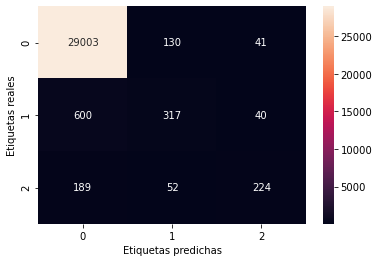

In [61]:
plot_conf_matrix(y_test, y_pred)

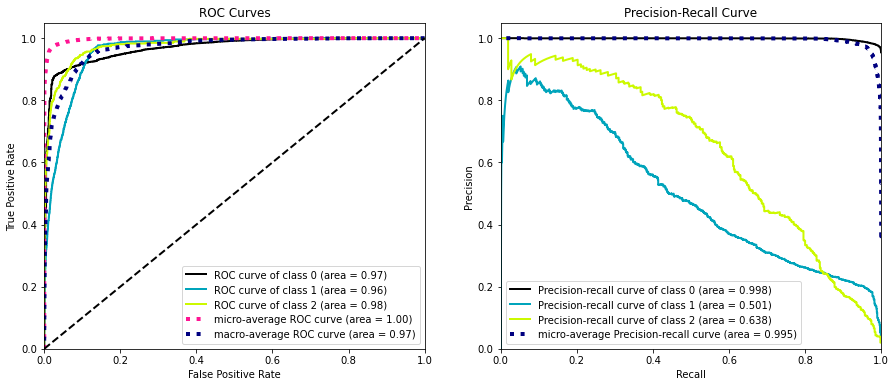

In [62]:
plot_roc_pr(y_test, y_score)

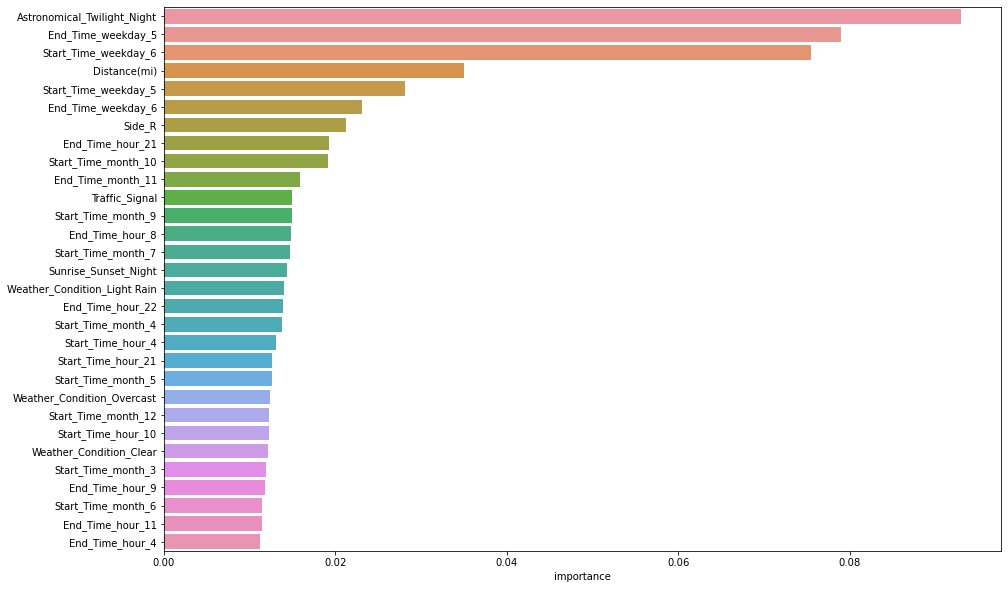

In [69]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = xgb.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

#### Probamos el modelo XGBoost con las clases balanceadas iguales con SMOTE

In [70]:
xgbc1 = XGBClassifier(learning_rate= 0.3, max_depth= 16, n_jobs=-1)

In [71]:
xgbc1.fit(X_train_sm, y_train_sm)
y_pred = xgbc1.predict(X_test)
y_score = xgbc1.predict_proba(X_test)

[20:32:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29174
           1       0.44      0.40      0.42       957
           2       0.59      0.54      0.56       465

    accuracy                           0.96     30596
   macro avg       0.67      0.64      0.65     30596
weighted avg       0.96      0.96      0.96     30596



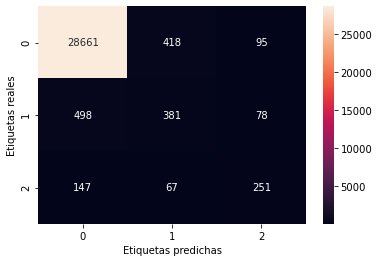

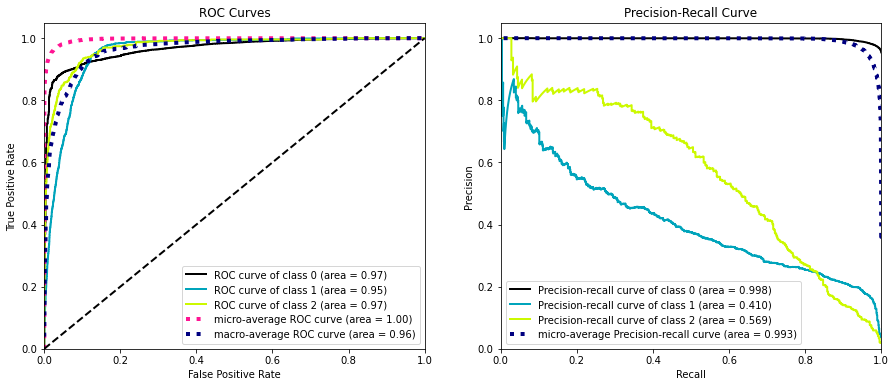

In [73]:
plot_conf_matrix(y_test, y_pred)
plot_roc_pr(y_test, y_score)

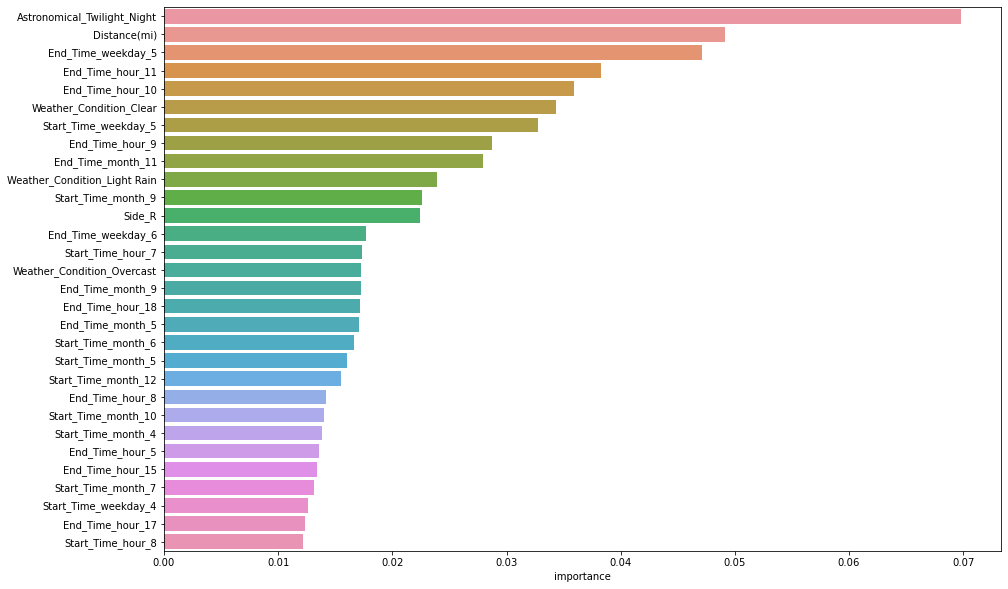

In [130]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = xgbc1.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

##### Probamos modelo XGBoost con 25000 de las clases minoritarias

In [74]:
xgbc2 = XGBClassifier(learning_rate= 0.3, max_depth= 16, n_jobs=-1) #Sin class_weight balanced

In [75]:
X_train_sm2, y_train_sm2 = smoting(X_train, y_train, 25000)

In [76]:
y_train_sm2.value_counts()

0    68073
2    25000
1    25000
Name: Severity, dtype: int64

In [77]:
xgbc2.fit(X_train_sm2, y_train_sm2)
y_pred = xgbc2.predict(X_test)
y_score = xgbc2.predict_proba(X_test)

[20:36:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29174
           1       0.46      0.37      0.41       957
           2       0.61      0.54      0.57       465

    accuracy                           0.96     30596
   macro avg       0.68      0.63      0.66     30596
weighted avg       0.96      0.96      0.96     30596



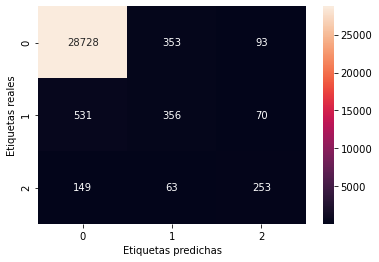

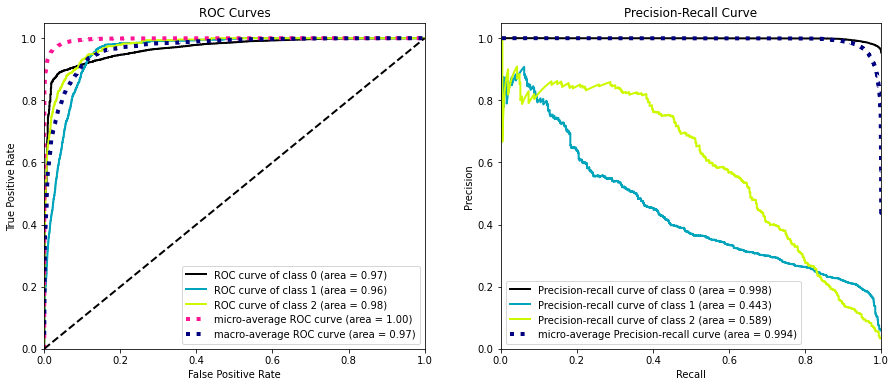

In [79]:
print(classification_report(y_test, y_pred))
plot_conf_matrix(y_test, y_pred)
plot_roc_pr(y_test, y_score)

##### Probamos modelo XGBoost con 40000 de las clases minoritarias

In [80]:
xgbc4 = XGBClassifier(learning_rate= 0.3, max_depth= 16, n_jobs=-1)

In [81]:
X_train_sm3, y_train_sm3 = smoting(X_train, y_train, 40000)

In [82]:
xgbc4.fit(X_train_sm3, y_train_sm3)
y_pred = xgbc4.predict(X_test)
y_score = xgbc4.predict_proba(X_test)

[20:40:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29174
           1       0.44      0.39      0.42       957
           2       0.59      0.56      0.57       465

    accuracy                           0.96     30596
   macro avg       0.67      0.64      0.66     30596
weighted avg       0.96      0.96      0.96     30596



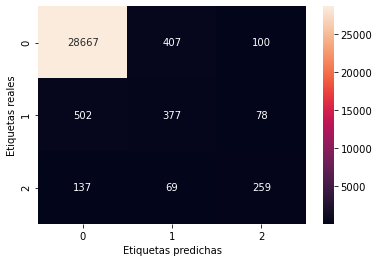

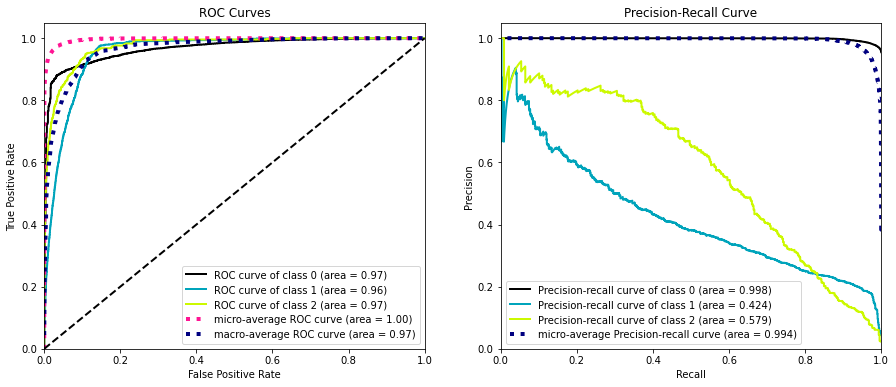

In [84]:
print(classification_report(y_test, y_pred))
plot_conf_matrix(y_test, y_pred)
plot_roc_pr(y_test, y_score)

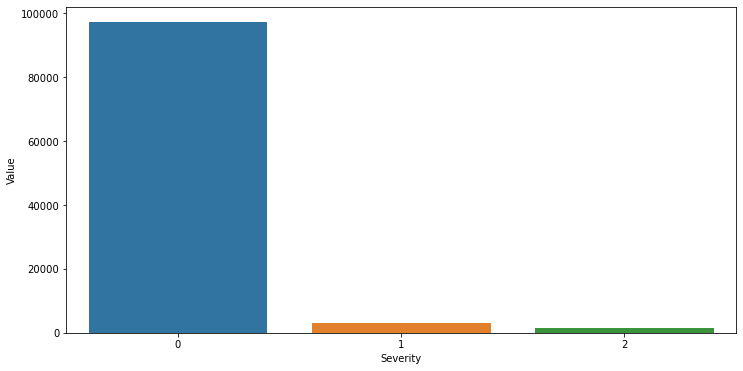

In [91]:
plt.figure(figsize=(12, 6))
ys = y.value_counts()
sns.barplot(ys.index, ys.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

## Random forest

In [92]:
rfc_cw = RandomForestClassifier(criterion='gini', max_depth=None, n_estimators=500, n_jobs=-1, class_weight='balanced')

In [93]:
rfc_cw.fit(X_train, y_train)
y_pred = rfc_cw.predict(X_test)
y_score = rfc_cw.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     29174
           1       0.81      0.19      0.31       957
           2       0.88      0.34      0.49       465

    accuracy                           0.96     30596
   macro avg       0.88      0.51      0.59     30596
weighted avg       0.96      0.96      0.95     30596



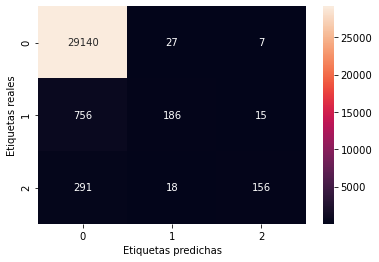

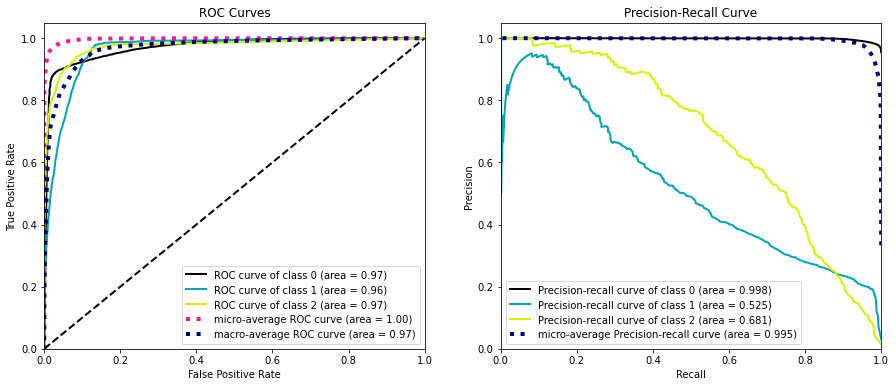

In [95]:
print(classification_report(y_test, y_pred))
plot_conf_matrix(y_test, y_pred)
plot_roc_pr(y_test, y_score)

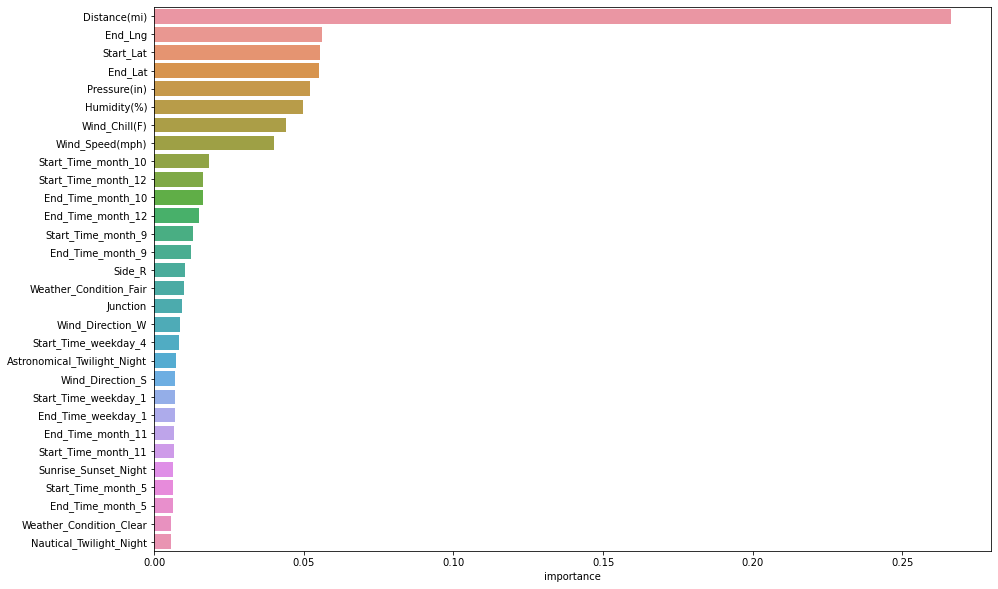

In [97]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = rfc_cw.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

#### Probamos random forest con clases smote balanceadas iguales

In [ ]:
rfc = RandomForestClassifier(criterion='gini', max_depth=None, n_estimators=500, n_jobs=-1)
rfc.fit(X_train_sm, y_train_sm)
y_pred = rfc.predict(X_test)
y_score = rfc.predict_proba(X_test)

In [ ]:
print(classification_report(y_test, y_pred2))
plot_conf_matrix(y_test, y_pred)
plot_roc_pr(y_test, y_score)

##### Probamos modelo random forest con 25000 de las clases minoritarias

In [ ]:
rfc1 = RandomForestClassifier(criterion='gini', max_depth=None, n_estimators=500, n_jobs=-1)

In [ ]:
rfc1.fit(X_train_sm2, y_train_sm2)
y_pred = rfc1.predict(X_test)
y_score = rfc1.predict_proba(X_test)

In [ ]:
print(classification_report(y_test, y_pred2))
plot_conf_matrix(y_test, y_pred)
plot_roc_pr(y_test, y_score)

##### Probamos modelo random forest con 40000 en las clases minoritarias

In [ ]:
rfc3 = RandomForestClassifier(criterion='gini', max_depth=None, n_estimators=500, n_jobs=-1)
rfc3.fit(X_train_sm3, y_train_sm3)
y_pred = rfc3.predict(X_test)
y_score = rfc3.predict_proba(X_test)

In [ ]:
print(classification_report(y_test, y_pred2))
plot_conf_matrix(y_test, y_pred)
plot_roc_pr(y_test, y_score)

## CatBoost

In [98]:
cat_cw = CatBoostClassifier(learning_rate=0.3, task_type='GPU',devices='0:1', auto_class_weights='Balanced')
cat_cw.fit(X_train, y_train)
y_pred = cat_cw.predict(X_test)
y_score = cat_cw.predict_proba(X_test)

0:	learn: 0.8935703	total: 12.2ms	remaining: 12.1s
1:	learn: 0.7903496	total: 22.1ms	remaining: 11s
2:	learn: 0.7282575	total: 31.9ms	remaining: 10.6s
3:	learn: 0.6890813	total: 40ms	remaining: 9.97s
4:	learn: 0.6590208	total: 49.2ms	remaining: 9.78s
5:	learn: 0.6392821	total: 58.3ms	remaining: 9.65s
6:	learn: 0.6173896	total: 66.4ms	remaining: 9.42s
7:	learn: 0.6055424	total: 74.9ms	remaining: 9.29s
8:	learn: 0.5946083	total: 84.4ms	remaining: 9.29s
9:	learn: 0.5865206	total: 93.8ms	remaining: 9.29s
10:	learn: 0.5781354	total: 102ms	remaining: 9.18s
11:	learn: 0.5714514	total: 110ms	remaining: 9.04s
12:	learn: 0.5628943	total: 118ms	remaining: 8.94s
13:	learn: 0.5546666	total: 126ms	remaining: 8.85s
14:	learn: 0.5479642	total: 134ms	remaining: 8.77s
15:	learn: 0.5429654	total: 141ms	remaining: 8.7s
16:	learn: 0.5374671	total: 149ms	remaining: 8.63s
17:	learn: 0.5324411	total: 157ms	remaining: 8.56s
18:	learn: 0.5268274	total: 165ms	remaining: 8.52s
19:	learn: 0.5202402	total: 173ms	re

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     29174
           1       0.33      0.58      0.42       957
           2       0.50      0.64      0.56       465

    accuracy                           0.94     30596
   macro avg       0.60      0.73      0.65     30596
weighted avg       0.96      0.94      0.95     30596



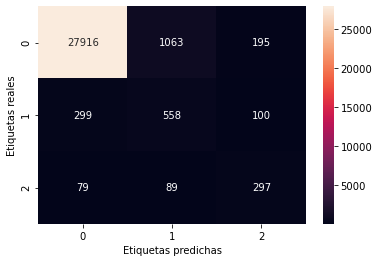

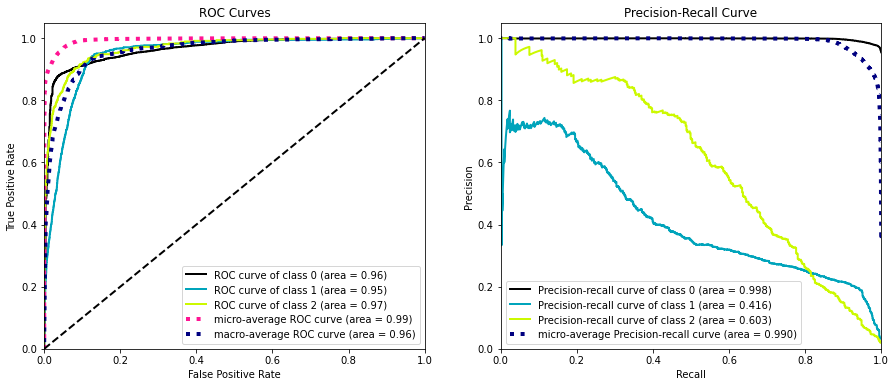

In [100]:
print(classification_report(y_test, y_pred))
plot_conf_matrix(y_test, y_pred)
plot_roc_pr(y_test, y_score)

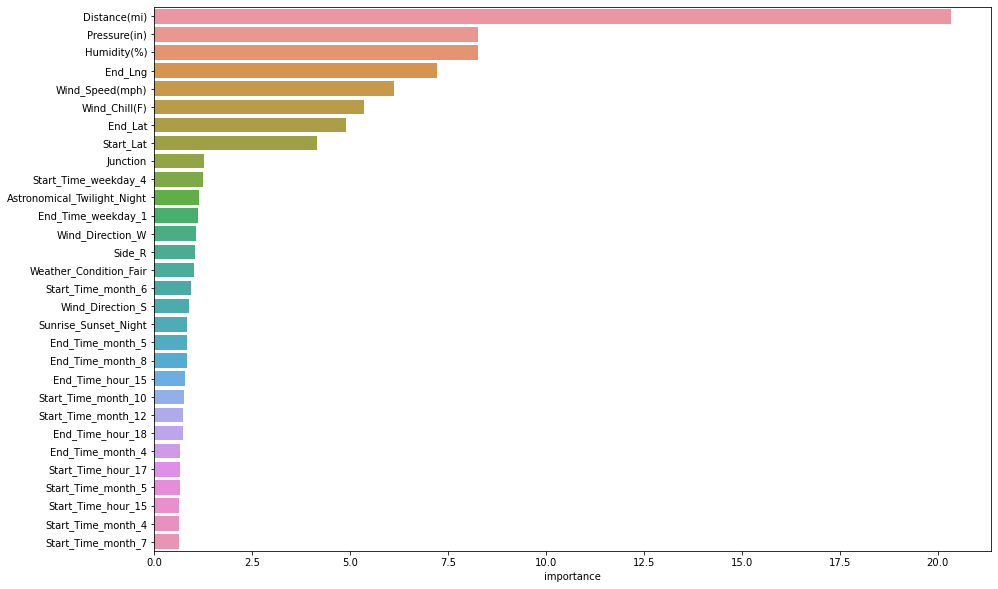

In [101]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = cat_cw.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

In [102]:
cat1 = CatBoostClassifier(learning_rate=0.3, task_type='GPU',devices='0:1')
cat1.fit(X_train_sm, y_train_sm)
y_pred = cat1.predict(X_test)
y_score = cat1.predict_proba(X_test)

0:	learn: 0.8686134	total: 13.7ms	remaining: 13.7s
1:	learn: 0.7596674	total: 25.4ms	remaining: 12.7s
2:	learn: 0.6941021	total: 37.9ms	remaining: 12.6s
3:	learn: 0.6474604	total: 49.2ms	remaining: 12.3s
4:	learn: 0.6150514	total: 60.3ms	remaining: 12s
5:	learn: 0.5900410	total: 72ms	remaining: 11.9s
6:	learn: 0.5717324	total: 83.1ms	remaining: 11.8s
7:	learn: 0.5570794	total: 94.3ms	remaining: 11.7s
8:	learn: 0.5437814	total: 105ms	remaining: 11.6s
9:	learn: 0.5341895	total: 116ms	remaining: 11.5s
10:	learn: 0.5247942	total: 129ms	remaining: 11.6s
11:	learn: 0.5186673	total: 141ms	remaining: 11.6s
12:	learn: 0.5085789	total: 152ms	remaining: 11.5s
13:	learn: 0.5031370	total: 163ms	remaining: 11.5s
14:	learn: 0.4962422	total: 174ms	remaining: 11.4s
15:	learn: 0.4878189	total: 186ms	remaining: 11.4s
16:	learn: 0.4829116	total: 198ms	remaining: 11.4s
17:	learn: 0.4761014	total: 211ms	remaining: 11.5s
18:	learn: 0.4689159	total: 224ms	remaining: 11.6s
19:	learn: 0.4633505	total: 236ms	rem

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     29174
           1       0.36      0.40      0.38       957
           2       0.46      0.49      0.48       465

    accuracy                           0.95     30596
   macro avg       0.60      0.62      0.61     30596
weighted avg       0.95      0.95      0.95     30596



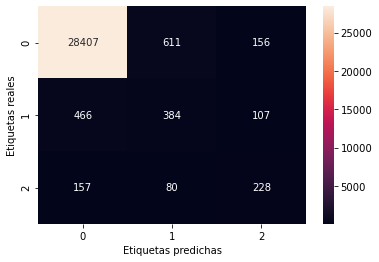

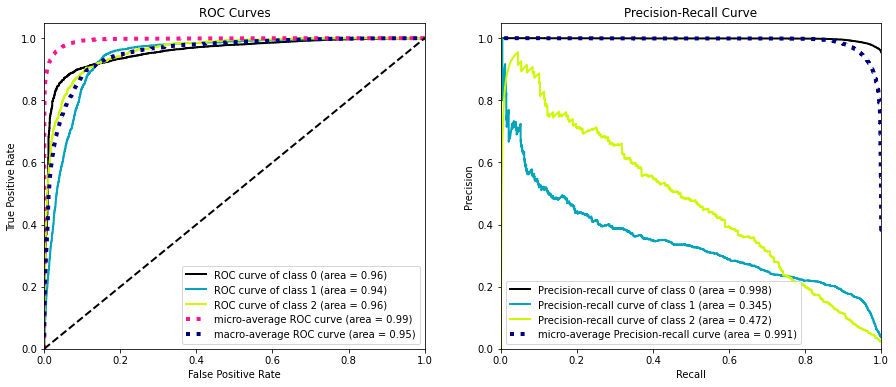

In [104]:
print(classification_report(y_test, y_pred))
plot_conf_matrix(y_test, y_pred)
plot_roc_pr(y_test, y_score)

In [108]:
cat2 = CatBoostClassifier(learning_rate=0.3, task_type='GPU',devices='0:1')
cat2.fit(X_train_sm2, y_train_sm2)
y_pred = cat2.predict(X_test)
y_score = cat2.predict_proba(X_test)

0:	learn: 0.8143308	total: 10.4ms	remaining: 10.4s
1:	learn: 0.6886430	total: 20ms	remaining: 9.98s
2:	learn: 0.6107976	total: 29.2ms	remaining: 9.7s
3:	learn: 0.5597450	total: 38ms	remaining: 9.45s
4:	learn: 0.5234751	total: 46.6ms	remaining: 9.28s
5:	learn: 0.4971609	total: 55.8ms	remaining: 9.24s
6:	learn: 0.4767392	total: 65.8ms	remaining: 9.33s
7:	learn: 0.4591761	total: 75.5ms	remaining: 9.37s
8:	learn: 0.4463359	total: 84.2ms	remaining: 9.28s
9:	learn: 0.4354608	total: 92.8ms	remaining: 9.19s
10:	learn: 0.4286697	total: 102ms	remaining: 9.16s
11:	learn: 0.4205553	total: 111ms	remaining: 9.12s
12:	learn: 0.4139568	total: 120ms	remaining: 9.12s
13:	learn: 0.4067161	total: 130ms	remaining: 9.13s
14:	learn: 0.4003905	total: 139ms	remaining: 9.1s
15:	learn: 0.3958257	total: 148ms	remaining: 9.09s
16:	learn: 0.3915124	total: 157ms	remaining: 9.08s
17:	learn: 0.3866256	total: 168ms	remaining: 9.15s
18:	learn: 0.3822878	total: 177ms	remaining: 9.15s
19:	learn: 0.3795689	total: 186ms	rem

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29174
           1       0.39      0.37      0.38       957
           2       0.50      0.49      0.50       465

    accuracy                           0.95     30596
   macro avg       0.62      0.61      0.62     30596
weighted avg       0.95      0.95      0.95     30596



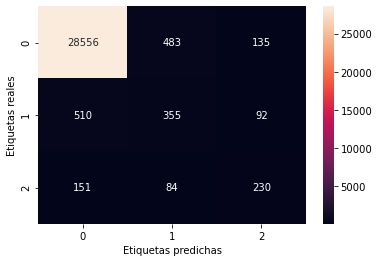

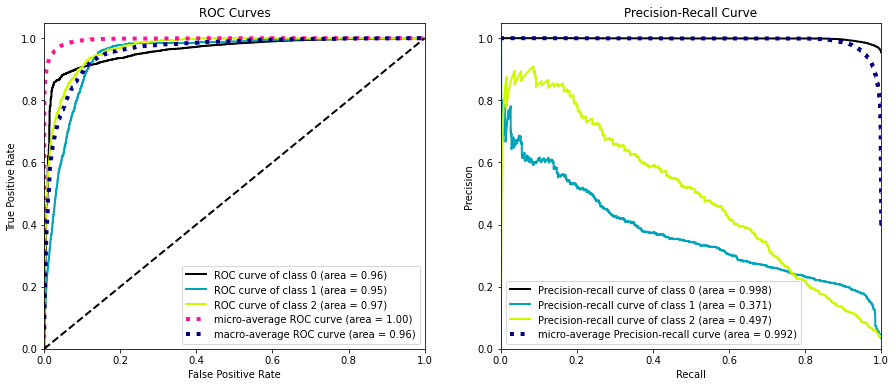

In [109]:
print(classification_report(y_test, y_pred))
plot_conf_matrix(y_test, y_pred)
plot_roc_pr(y_test, y_score)

In [110]:
cat3 = CatBoostClassifier(learning_rate=0.3, task_type='GPU',devices='0:1')
cat3.fit(X_train_sm3, y_train_sm3)
y_pred = cat3.predict(X_test)
y_score = cat3.predict_proba(X_test)

0:	learn: 0.8418804	total: 11.8ms	remaining: 11.7s
1:	learn: 0.7263160	total: 21.9ms	remaining: 10.9s
2:	learn: 0.6560949	total: 31.7ms	remaining: 10.5s
3:	learn: 0.6071088	total: 41.4ms	remaining: 10.3s
4:	learn: 0.5719188	total: 51.3ms	remaining: 10.2s
5:	learn: 0.5436025	total: 61.5ms	remaining: 10.2s
6:	learn: 0.5218221	total: 71.6ms	remaining: 10.2s
7:	learn: 0.5068719	total: 81.9ms	remaining: 10.2s
8:	learn: 0.4931704	total: 91.9ms	remaining: 10.1s
9:	learn: 0.4823336	total: 102ms	remaining: 10.1s
10:	learn: 0.4751164	total: 112ms	remaining: 10s
11:	learn: 0.4687560	total: 121ms	remaining: 9.97s
12:	learn: 0.4607422	total: 131ms	remaining: 9.93s
13:	learn: 0.4534417	total: 141ms	remaining: 9.94s
14:	learn: 0.4487877	total: 152ms	remaining: 9.95s
15:	learn: 0.4436247	total: 162ms	remaining: 9.99s
16:	learn: 0.4374076	total: 172ms	remaining: 9.96s
17:	learn: 0.4319930	total: 182ms	remaining: 9.95s
18:	learn: 0.4267422	total: 192ms	remaining: 9.93s
19:	learn: 0.4231962	total: 204ms	

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29174
           1       0.39      0.40      0.39       957
           2       0.50      0.52      0.51       465

    accuracy                           0.95     30596
   macro avg       0.62      0.63      0.63     30596
weighted avg       0.95      0.95      0.95     30596



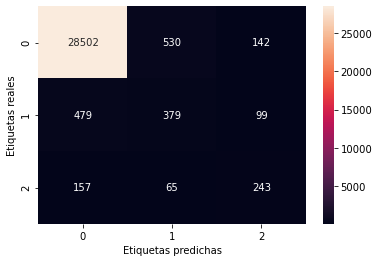

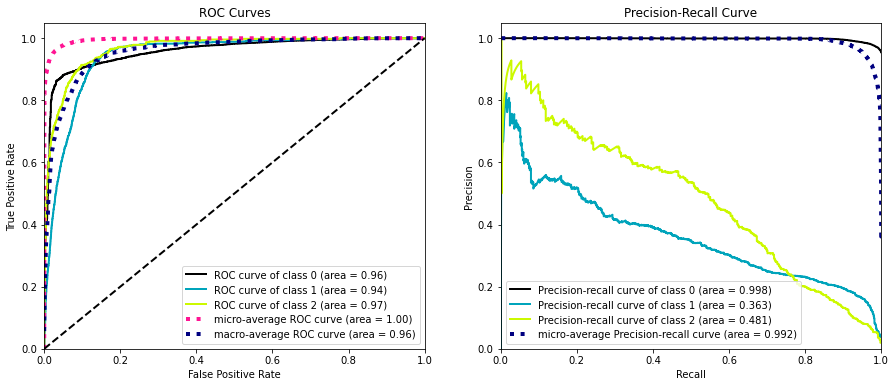

In [111]:
print(classification_report(y_test, y_pred))
plot_conf_matrix(y_test, y_pred)
plot_roc_pr(y_test, y_score)

### Probamos el mejor modelos para el año 2019 en el año 2020

In [112]:
df_20_reduced = df_20[select].reset_index(drop=True)

In [113]:
df_20_reduced.shape

(223927, 80)

In [114]:
X_20 = df_20_reduced
y_20 = df_20.Severity - 2

In [115]:
y_20.value_counts()

0    218029
1      3743
2      2155
Name: Severity, dtype: int64

In [116]:
y_predict_20 = cat_cw.predict(X_20)
y_score = cat_cw.predict_proba(X_20)

              precision    recall  f1-score   support

           0       0.97      0.55      0.71    218029
           1       0.02      0.23      0.04      3743
           2       0.01      0.21      0.02      2155

    accuracy                           0.55    223927
   macro avg       0.33      0.33      0.25    223927
weighted avg       0.94      0.55      0.69    223927



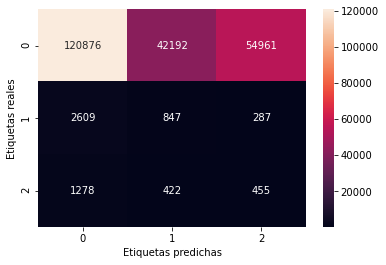

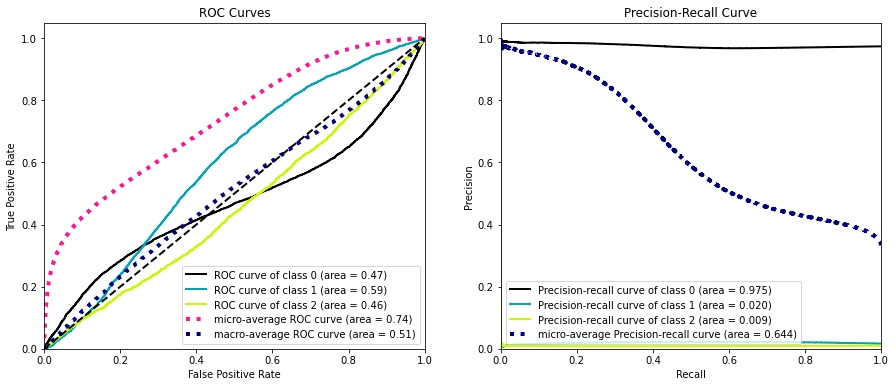

In [121]:
print(classification_report(y_20, y_predict_20))
plot_conf_matrix(y_20, y_predict_20)
plot_roc_pr(y_20, y_score)

##### No es buena la prediccion que usamos del año 2019 para el 2020 por considerarse al 2020 un año "especial"


### Probamos el mejor modelos para el año 2019 en todos los años menos el 2020

In [122]:
df_menos_20_reduced = df_menos_20[select].reset_index(drop=True)

In [123]:
df_menos_20_reduced.shape

(80923, 80)

In [124]:
X_menos_20 = df_menos_20_reduced
y_menos_20 = df_menos_20.Severity - 2 

In [125]:
y_menos_20.value_counts()

0    68784
1     9331
2     2808
Name: Severity, dtype: int64

In [126]:
y_predict_menos_20 = cat_cw.predict(X_menos_20)
y_score = cat_cw.predict_proba(X_menos_20)

              precision    recall  f1-score   support

           0       0.88      0.50      0.64     68784
           1       0.13      0.50      0.20      9331
           2       0.11      0.24      0.15      2808

    accuracy                           0.49     80923
   macro avg       0.37      0.41      0.33     80923
weighted avg       0.77      0.49      0.57     80923



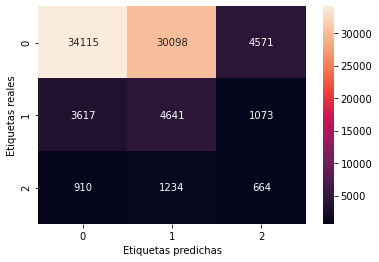

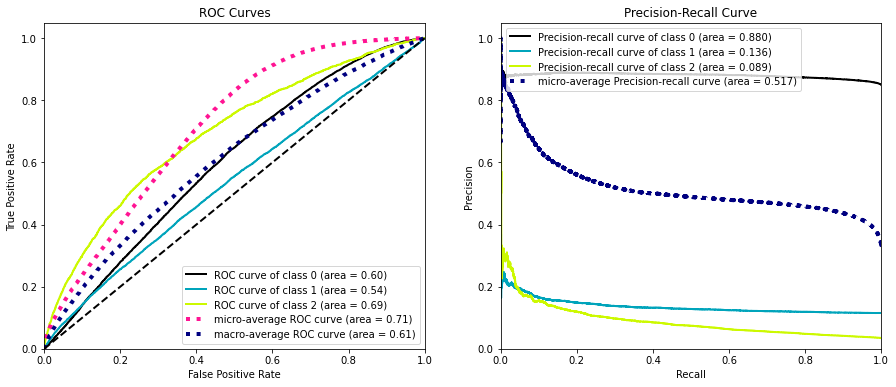

In [127]:
print(classification_report(y_menos_20, y_predict_menos_20))
plot_conf_matrix(y_menos_20, y_predict_menos_20)
plot_roc_pr(y_menos_20, y_score)

##### Usando el modelo del 2019 para predecir en todos los años menos el 2020 es mucho mejor

In [128]:
fin = default_timer()

In [129]:
print(fin - inicio)

7997.9305188
